<a href="https://colab.research.google.com/github/behcamilo/Visualizacao-de-Dados-E2/blob/main/visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

In [3]:
apt_df = pd.read_csv('apt_visualizacao_dados_2.csv')

In [18]:
apt_df.describe()

,bathrooms,bedrooms,price,area,latitude,longitude
count,83428.000000,83428.000000,83428.000000,83428.000000,83428.000000,83428.000000
mean,1.441980,1.713022,1518.467828,88.295189,36.887177,-91.306221
std,0.536013,0.727376,908.518917,37.543479,4.581722,15.718704
min,-1.000000,-1.000000,100.000000,11.000000,19.573800,-159.369800
25%,1.000000,1.000000,1010.000000,68.000000,33.731700,-104.768800
50%,1.000000,2.000000,1349.000000,84.000000,37.189200,-84.502200
75%,2.000000,2.000000,1781.000000,103.000000,39.907100,-77.498000
max,9.000000,9.000000,52500.000000,4647.000000,64.833200,-68.778800


## apresentação

In [47]:
import plotly.express as px

df_classificado = apt_df.copy()

def classify_area(area):
    if 0 <= area < 50:
        return 0
    elif 50 <= area < 100:
        return 1
    elif 100 <= area < 150:
        return 2
    elif 150 <= area <= 200:
        return 3
    else:
        return None

df_classificado['area_class'] = df_classificado['area'].apply(classify_area)

df_classificado['n_amenities'] = df_classificado['amenities'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)

df_plot = df_classificado[
    (df_classificado['area_class'].notnull()) &
    (df_classificado['bathrooms'] >= 0) &
    (df_classificado['bedrooms'] >= 0) &
    (df_classificado['area'] > 0) &
    (df_classificado['area'] <= 200)
]

df_plot = df_plot[['area', 'n_amenities', 'bedrooms', 'bathrooms', 'area_class']].dropna()

fig = px.parallel_coordinates(
    df_plot,
    dimensions=['area', 'n_amenities', 'bedrooms', 'bathrooms'],
    color='area_class',
    color_continuous_scale=px.colors.diverging.RdYlBu_r,
    labels={
        'area': 'Área (m²)',
        'n_amenities': 'Comodidades',
        'bedrooms': 'Quartos',
        'bathrooms': 'Banheiros',
        'area_class': 'Classe de Área'
    },
    title='Coordenadas Paralelas: Área, Comodidades, Quartos, Banheiros'
)

fig.update_coloraxes(
    colorbar=dict(
        tickvals=[0, 1, 2, 3],
        ticktext=[
            '0 a 50 m²',
            '50 a 100 m²',
            '100 a 150 m²',
            '150 a 200 m²'
        ],
        title='Classe de Área'
    )
)

fig.update_traces(dimensions=[
    dict(label='Área (m²)', values=df_plot['area']),
    dict(label='Comodidades', values=df_plot['n_amenities']),
    dict(label='Quartos', values=df_plot['bedrooms']),
    dict(label='Banheiros', values=df_plot['bathrooms'])
])

fig.show()


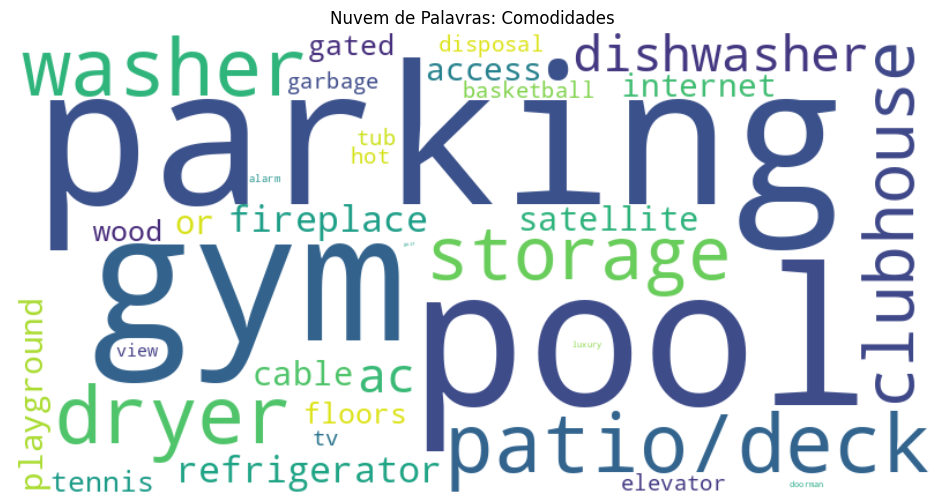

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# 1. Unir todas as amenities em uma única string
all_amenities = apt_df['amenities'].dropna().astype(str).str.cat(sep=',')

# 2. Separar frases por vírgula, depois dividir em palavras
phrases = [item.strip() for item in all_amenities.split(',') if item.strip()]
words = []
for phrase in phrases:
    words.extend(re.split(r'\s+', phrase))  # divide por espaços

# 3. Converter para minúsculas e contar a frequência
word_freq = Counter(word.lower() for word in words if word.strip())

# 4. Criar a nuvem de palavras com frequência real
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_freq)

# 5. Visualizar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras: Comodidades")
plt.savefig('nuvem_de_palavras.png', dpi=300, bbox_inches='tight')
plt.show()
